In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist  # use lowercase 'fashion_mnist' instead of 'FashionMNIST'
import matplotlib.pyplot as plt

C:\Users\Jui\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [55]:
import matplotlib as mpl
from sklearn import __version__ as sklearn_version

# Print versions of the libraries
print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Scikit-Learn version: {sklearn_version}")

NumPy version: 1.26.2
TensorFlow version: 2.14.0
Matplotlib version: 3.5.1
Scikit-Learn version: 1.0.2


# Dimensionality Reduction for Classification FashionMNIST

In the Fashion-MNIST dataset, each image corresponds to one of 10 classes, which represent different types of clothing items.
The class labels are provided as indices (0–9), and each index corresponds to a specific class name. Here are the mappings:
    
Index	Class Name
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot





In [2]:
# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class labels for "dress" and "sandal"
dress_label = 3  # FashionMNIST label for "dress"
sandal_label = 5  # FashionMNIST label for "sandal"

# Filter the dataset to include only "dress" and "sandal" images
dress_indices = np.where(y_train == dress_label)[0]
sandal_indices = np.where(y_train == sandal_label)[0]
selected_indices = np.concatenate((dress_indices, sandal_indices))

x_train_filtered = x_train[selected_indices]
y_train_filtered = y_train[selected_indices]

# Filter the testing dataset as well
dress_indices_test = np.where(y_test == dress_label)[0]
sandal_indices_test = np.where(y_test == sandal_label)[0]
selected_indices_test = np.concatenate((dress_indices_test, sandal_indices_test))

x_test_filtered = x_test[selected_indices_test]
y_test_filtered = y_test[selected_indices_test]

# Printing the shape of filtered datasets
print("Filtered Training Data Shape:", x_train_filtered.shape)
print("Filtered Testing Data Shape:", x_test_filtered.shape)

Filtered Training Data Shape: (12000, 28, 28)
Filtered Testing Data Shape: (2000, 28, 28)


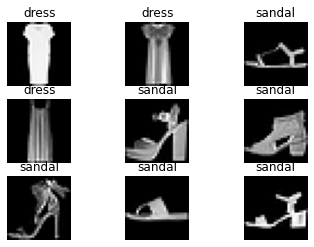

In [3]:
import random
import matplotlib.pyplot as plt

# Define a function to map class labels to class names
def class_to_classname(e):
    if e == 3:
        return "dress"
    elif e == 5:
        return "sandal"
    else:
        return "something is wrong"

# Plot 9 random images from x_train_filtered with corresponding class names
for i in range(0, 9):
    randInt = random.randint(0, len(x_train_filtered) - 1)
    plt.subplot(330 + 1 + i)
    
    img = x_train_filtered[randInt]
    label = y_train_filtered[randInt]  # Get the label without indexing it as an array
    plt.title(class_to_classname(label))  # Pass label directly to function
    
    plt.axis('off')
    plt.imshow(img, cmap='gray')

plt.show()


In [4]:
x_train_filtered[1].shape

(28, 28)

# Pre-processing such as alignment and normalization of the data

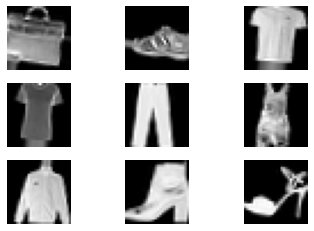

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape and normalize the images (normalize to range [0, 1])
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Define an image data generator for augmentation 
datagen = ImageDataGenerator(
    rotation_range=10,          # Rotate by 10 degrees
    width_shift_range=0.1,      # Shift width by 10%
    height_shift_range=0.1,     # Shift height by 10%
    zoom_range=0.1,             # Zoom by 10%
)

# Fit the data generator on training data (augmentation only applied during training)
datagen.fit(x_train)

# Visualize a few augmented images to check alignment
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    break

plt.show()


In [6]:
x_train_filtered = x_train_filtered.astype('float32')
x_test_filtered = x_test_filtered.astype('float32')

x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0

# values have now been normalized between 0 and 1

In [7]:
# rename vars
x_train = x_train_filtered
x_test = x_test_filtered
y_train = y_train_filtered
y_test = y_test_filtered

In [8]:
# Assuming y_train is a list or array of integer labels
for index, i in enumerate(y_train):
    if i == 3:
        y_train[index] = 0
    elif i == 5:
        y_train[index] = 1


# Feature Vectors

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.12941177 0.3764706  0.6862745  0.6117647
  0.2509804  0.05490196 0.21176471 0.5372549  0.8        0.7607843
  0.4        0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.28627452 0.7294118  0.69411767 0.7176471  0.6862745  0.7372549
  0.9098039  1.         0.8745098  0.85882354 0.7607843  0.7019608
  0.7294118  0.8352941  0.57254905 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.13725491
  0.6392157  0.54901963 0.5882353  0.59607846 0.5882353  0.57254905
  0.6862745  0.6862745  0.6784314  0.67058825 0.6117647  0.59607846
  0.5803922  0.5058824  0.6117647  0.54901963 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5882353
  0.5568628  0.54901

In [10]:
# Flatten
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Printing the shape of the flattened datasets
print("Flattened Training Data Shape:", x_train_flattened.shape)
print("Flattened Testing Data Shape:", x_test_flattened.shape)

Flattened Training Data Shape: (12000, 784)
Flattened Testing Data Shape: (2000, 784)


In [11]:
class_to_classname = lambda x: "dress" if (x == 0) else "sandal"

In [12]:
print(x_train_flattened[4999])
print(class_to_classname(y_train[4999]))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.02745098 0.18431373 0.41568628 0.5176471
 0.2627451  0.16470589 0.1764706  0.32156864 0.5137255  0.5019608
 0.1764706  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.19607843
 0.49019608 0.40392157 0.37254903 0.6862745  0.88235295 0.6901961
 0.80784315 0.85490197 0.6509804  0.36078432 0.40392157 0.49411765
 0.18431373 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.5019608  0.34509805 0.29803923
 0.28627452 0.22352941 0.32156864 0.4392157  0.40392157 0.29803923
 0.22352941 0.30980393 0.31764707 0.37254903 0.5058824  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.03137255 0.5411765  0.37254903 0.3372549  0.32156864 0.3058

# Classification prior to PCA

In [13]:
dress_samples = x_train_flattened[y_train.flatten() == 0]
sandal_samples = x_train_flattened[y_train.flatten() == 1] 

In [14]:
# Calculate mean vectors for each class
mean_dress = np.mean(dress_samples, axis=0)
mean_sandal = np.mean(sandal_samples, axis=0)

# Calculate covariance matrices for each class
cov_dress = np.cov(dress_samples, rowvar=False)
cov_sandal = np.cov(sandal_samples, rowvar=False)

In [15]:
def mahalanobis_distance(x, mean, cov):
    # Calculate Mahalanobis distance
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    distance = np.sqrt(np.dot(np.dot(diff, inv_cov), diff.T))
    return distance

def mahalanobis_classifier(sample, mean_dress, cov_dress, mean_sandal, cov_sandal):
    # Calculate Mahalanobis distance for both classes
    dist_to_dress = mahalanobis_distance(sample, mean_dress, cov_dress)
    dist_to_sandal = mahalanobis_distance(sample, mean_sandal, cov_sandal)
    
    # Classify based on minimum distance
    if dist_to_dress < dist_to_sandal:
        return 0  # dress
    else:
        return 1  # sandal

In [16]:
# Verify classifier works on test set
def mahalanobis_distance(x, mean, cov, regularization=1e-5):
    # Calculate Mahalanobis distance
    diff = x - mean
    # Regularize the covariance matrix by adding to the diagonal
    cov_reg = cov + np.eye(cov.shape[0]) * regularization
    inv_cov = np.linalg.inv(cov_reg)
    distance = np.sqrt(np.dot(np.dot(diff, inv_cov), diff.T))
    return distance

print(class_to_classname(mahalanobis_classifier(x_train_flattened[4000], mean_dress, cov_dress, mean_sandal, cov_sandal)))
print(class_to_classname(y_train[4000]))

dress
dress


In [17]:
# Assuming y_train is a list or array of integer labels
for index, i in enumerate(y_train):
    if i == 3:
        y_train[index] = 0
    elif i == 5:
        y_train[index] = 1


In [18]:
from IPython.display import clear_output
import os
import pickle


In [19]:
print(class_to_classname(mahalanobis_classifier(x_test_flattened[3], mean_dress, cov_dress, mean_sandal, cov_sandal)))
print(class_to_classname(y_test[3]))


dress
sandal


In [20]:
for i in range(10):
    sample = x_test_flattened[i]
    dist_dress = mahalanobis_distance(sample, mean_dress, cov_dress)
    dist_sandal = mahalanobis_distance(sample, mean_sandal, cov_sandal)
    print(f"Sample {i+1}: Distance to Dress - {dist_dress}, Distance to Sandal - {dist_sandal}")


Sample 1: Distance to Dress - 11.748940261587482, Distance to Sandal - 96.07655493601322
Sample 2: Distance to Dress - 18.08273222473449, Distance to Sandal - 187.28157933468674
Sample 3: Distance to Dress - 36.93217438036407, Distance to Sandal - 182.50890426766702
Sample 4: Distance to Dress - 28.841509592276314, Distance to Sandal - 255.8702435701163
Sample 5: Distance to Dress - 23.25312504471716, Distance to Sandal - 169.5270142640576
Sample 6: Distance to Dress - 19.716339165805895, Distance to Sandal - 192.13307557938913
Sample 7: Distance to Dress - 14.003183194278272, Distance to Sandal - 129.22602373867807
Sample 8: Distance to Dress - 12.34224741682718, Distance to Sandal - 142.19516710032062
Sample 9: Distance to Dress - 13.962749476450503, Distance to Sandal - 141.85184450665201
Sample 10: Distance to Dress - 39.609442048592726, Distance to Sandal - 192.5049710792381


In [21]:
regularization_factor = 1e-5
cov_dress += np.eye(cov_dress.shape[0]) * regularization_factor
cov_sandal += np.eye(cov_sandal.shape[0]) * regularization_factor


In [76]:
def mahalanobis_classifier(sample, mean_dress, cov_dress, mean_sandal, cov_sandal):
    dist_to_dress = mahalanobis_distance(sample, mean_dress, cov_dress)
    dist_to_sandal = mahalanobis_distance(sample, mean_sandal, cov_sandal)
    # Return the class with the minimum distance
    return 3 if dist_to_dress < dist_to_sandal else 5


In [34]:
# Calculate classifier accuracy

n_tests = len(x_test_flattened)
n_correct =  0
test_1_results = [] # index: test number, value: test result

if not os.path.isfile("Mini_EE4476_test2.pkl"):
    for i in range(0, n_tests):
        sample = x_test_flattened[i]
        predicted_class = mahalanobis_classifier(sample, mean_dress, cov_dress, mean_sandal, cov_sandal)
        print(f'Performing test {i + 2} of {n_tests}...')
        true_label = y_test[i]
        print(f'Actual class: {class_to_classname(true_label)}')
        
        print(f'Predicted class: {class_to_classname(predicted_class)}')
        
        if predicted_class == true_label:
            n_correct += 1
            test_1_results.append(True)
        else:
            test_1_results.append(False)

        cumulative_accuracy = (n_correct) / (i+1)
        print(f'Current Accuracy: {n_correct} out of {i+1} ({round(cumulative_accuracy, 3) * 100} %)')
        
        clear_output(wait=True)

    results_1_tuple = (n_correct, test_1_results)

    with open('Mini_EE4476_test.pkl', 'wb') as file:
        pickle.dump(results_1_tuple, file)

else:
    with open('Mini_EE4476_test2.pkl', 'rb') as file:
        print("Pickeled results found! Loading from pickle...")
        results_1_tuple = pickle.load(file)
        n_correct = results_1_tuple[0]
        test_1_results = results_1_tuple[1]

Performing test 2001 of 2000...
Actual class: sandal
Predicted class: sandal
Current Accuracy: 1998 out of 2000 (99.9 %)


In [36]:
cumulative_accuracy = ((n_correct) / (i+1))*100
print(cumulative_accuracy )


99.9


In [25]:
for i in range(10):
    sample = x_test_flattened[i]
    true_label = y_test[i]
    predicted_class = mahalanobis_classifier(sample, mean_dress, cov_dress, mean_sandal, cov_sandal)
    
    print(f"Test Sample {i+1}: True Label - {class_to_classname(true_label)}, Predicted - {class_to_classname(predicted_class)}")


Test Sample 1: True Label - sandal, Predicted - sandal
Test Sample 2: True Label - sandal, Predicted - sandal
Test Sample 3: True Label - sandal, Predicted - sandal
Test Sample 4: True Label - sandal, Predicted - sandal
Test Sample 5: True Label - sandal, Predicted - sandal
Test Sample 6: True Label - sandal, Predicted - sandal
Test Sample 7: True Label - sandal, Predicted - sandal
Test Sample 8: True Label - sandal, Predicted - sandal
Test Sample 9: True Label - sandal, Predicted - sandal
Test Sample 10: True Label - sandal, Predicted - sandal


In [38]:
import time
import random

In [40]:
# Getting classifier timings

test_1_timings = []

sample_index = random.randint(0, (n_tests-50))

for i in range(0, 50):
    sample = x_test_flattened[i]
    st = time.time()
    predicted_class = mahalanobis_classifier(sample, mean_dress, cov_dress, mean_sandal, cov_sandal)
    et = time.time()
    test_1_timings.append((et-st))
    print(f'Performing test {i + 1} of 50...')
    true_label = y_test[i]
    print(f'Actual class: {class_to_classname(true_label)}')
    print(f'Predicted class: {class_to_classname(predicted_class)}')
    print(f'Prediction took {et-st} seconds to make.')
    clear_output(wait=True)

Performing test 50 of 50...
Actual class: sandal
Predicted class: sandal
Prediction took 0.10300397872924805 seconds to make.


In [41]:
test_1_average = sum(test_1_timings)/len(test_1_timings)

print(f'Before PCA, the classifier takes {test_1_average} seconds to make a classification on average.')

Before PCA, the classifier takes 0.13151740550994873 seconds to make a classification on average.


# PCA

In [42]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_flattened)

explained_variance = pca.explained_variance_ratio_

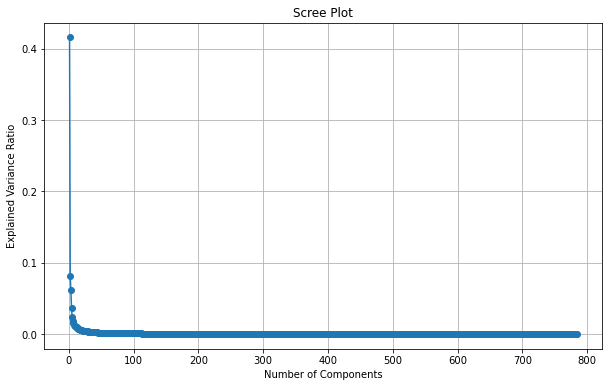

In [43]:
# Plotting the Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

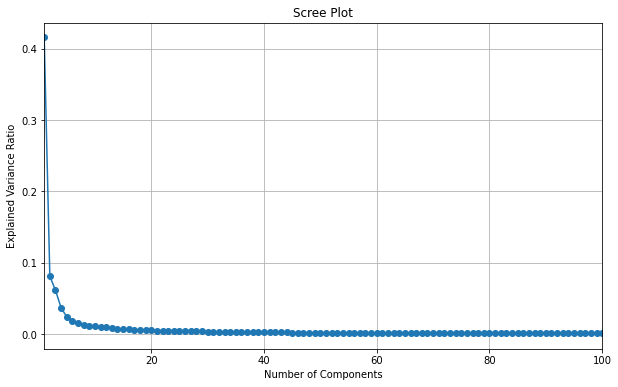

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.xlim(1,100)
plt.show()

# Classification after PCA 

In [45]:
n = 79

pca = PCA(n_components=n)

pca.fit(x_train_flattened)

x_train_pca = pca.transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

In [46]:
dress_samples = x_train_pca[y_train.flatten() == 0]
sandal_samples = x_train_pca[y_train.flatten() == 1] 

# Calculate mean vectors for each class
mean_dress = np.mean(dress_samples, axis=0)
mean_sandal = np.mean(sandal_samples, axis=0)

# Calculate covariance matrices for each class
cov_dress = np.cov(dress_samples, rowvar=False)
cov_sandal = np.cov(sandal_samples, rowvar=False)

In [49]:
# Calculate classifier accuracy

n_tests = len(x_test_pca)
n_correct =  0
test_2_results = [] # index: test number, value: test result

if not os.path.isfile("mini-ee4476_test_2_results.pkl"):
    for i in range(0, n_tests):
        sample = x_test_pca[i]
        predicted_class = mahalanobis_classifier(sample, mean_dress, cov_dress, mean_sandal, cov_sandal)
        print(f'Performing test {i + 2} of {n_tests}...')
        true_label = y_test[i]
        print(f'Actual class: {class_to_classname(true_label)}')
        
        print(f'Predicted class: {class_to_classname(predicted_class)}')
        
        if predicted_class == true_label:
            n_correct += 1
            test_2_results.append(True)
        else:
            test_2_results.append(False)

        cumulative_accuracy = (n_correct) / (i+1)
        print(f'Current Accuracy: {n_correct} out of {i+1} ({round(cumulative_accuracy, 3) * 100} %)')
        
        clear_output(wait=True)

    results_2_tuple = (n_correct, test_2_results)

    with open('ASSIGNMENT_test_2_results.pkl', 'wb') as file:
        pickle.dump(results_2_tuple, file)

else:
    with open('mini-ee4476_test_2_results.pkl', 'rb') as file:
        print("Pickeled results found! Loading from pickle...")
        results_2_tuple = pickle.load(file)
        n_correct = results_2_tuple[0]
        test_2_results = results_2_tuple[1]

Performing test 2001 of 2000...
Actual class: sandal
Predicted class: sandal
Current Accuracy: 1997 out of 2000 (99.9 %)


In [50]:
print(f"Final Accuracy: {n_correct} out of {n_tests} ({round((n_correct / n_tests),3) * 100} %)")

Final Accuracy: 1997 out of 2000 (99.9 %)


In [53]:
# Getting classifier timings

test_2_timings = []

sample_index = random.randint(0, (n_tests-50))

for i in range(0, 50):
    sample = x_test_pca[i]
    st = time.time()
    predicted_class = mahalanobis_classifier(sample, mean_dress, cov_dress, mean_sandal, cov_sandal)
    et = time.time()
    test_2_timings.append((et-st))
    print(f'Performing test {i + 1} of {50}...')
    true_label = y_test[i]
    print(f'Actual class: {class_to_classname(true_label)}')
    print(f'Predicted class: {class_to_classname(predicted_class)}')
    print(f'Prediction took {et-st} seconds to make.')
    clear_output(wait=True)

Performing test 50 of 50...
Actual class: sandal
Predicted class: sandal
Prediction took 0.0 seconds to make.


In [54]:
test_2_average = sum(test_2_timings)/len(test_2_timings)

print(f'After PCA, the classifier takes {test_2_average} seconds to make a classification on average.' )

After PCA, the classifier takes 0.0059237051010131835 seconds to make a classification on average.


In [67]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np

# Flatten the data if it's 3D (e.g., image data)
if x_train.ndim == 3:
    x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Flatten each sample
    x_test_flattened = x_test.reshape(x_test.shape[0], -1)
else:
    x_train_flattened = x_train
    x_test_flattened = x_test

# Set range of components
components_range = [5, 10, 20, 50, 100]  # Adjust based on dataset size and complexity
accuracy_results = []

# Loop through different numbers of components
for n_components in components_range:
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train_flattened)
    x_test_pca = pca.transform(x_test_flattened)

    # Calculate mean vectors and covariance matrices for Mahalanobis classifier
    dress_samples = x_train_pca[y_train.flatten() == 0]
    sandal_samples = x_train_pca[y_train.flatten() == 1]
    
    mean_dress = np.mean(dress_samples, axis=0)
    mean_sandal = np.mean(sandal_samples, axis=0)
    
    cov_dress = np.cov(dress_samples, rowvar=False)
    cov_sandal = np.cov(sandal_samples, rowvar=False)

    # Classify test samples using Mahalanobis distance
    predictions = []
    for sample in x_test_pca:
        predicted_class = mahalanobis_classifier(sample, mean_dress, cov_dress, mean_sandal, cov_sandal)
        predictions.append(predicted_class)

    # Record accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracy_results.append((n_components, accuracy))

# Print or visualize results
print("PCA Accuracy Results:")
for components, acc in accuracy_results:
    print(f"Accuracy with {components} components: {acc:.2f}")


PCA Accuracy Results:
Accuracy with 5 components: 0.08
Accuracy with 10 components: 0.08
Accuracy with 20 components: 0.08
Accuracy with 50 components: 0.08
Accuracy with 100 components: 0.08


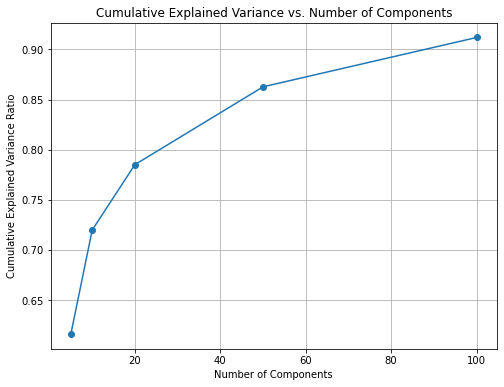

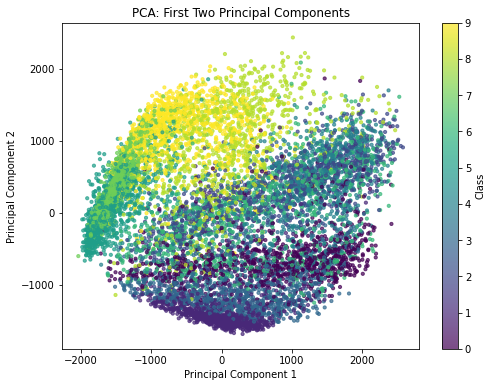

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of PCA Explained Variance Ratio
plt.figure(figsize=(8, 6))
plt.plot(components_range, [sum(pca.explained_variance_ratio_[:n]) for n in components_range], marker='o')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

# Visualizing the first two principal components (if dimensionality allows)
if x_test_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap='viridis', s=10, alpha=0.7)
    plt.colorbar(label='Class')
    plt.title('PCA: First Two Principal Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()



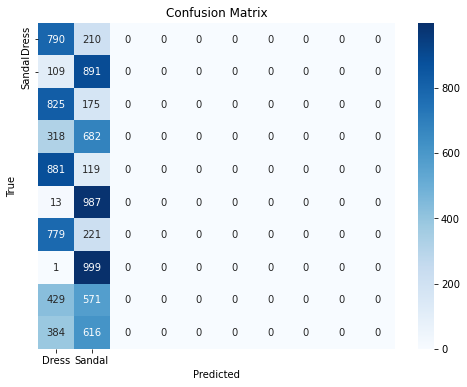

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def mahalanobis_predict(samples, mean_class1, cov_class1, mean_class2, cov_class2):
    """
    Predict classes using Mahalanobis distance.

    Parameters:
    samples (array-like): The test samples.
    mean_class1 (array-like): Mean of class 1.
    cov_class1 (array-like): Covariance matrix of class 1.
    mean_class2 (array-like): Mean of class 2.
    cov_class2 (array-like): Covariance matrix of class 2.

    Returns:
    numpy array: Predicted class labels.
    """
    predictions = []
    inv_cov_class1 = np.linalg.inv(cov_class1)
    inv_cov_class2 = np.linalg.inv(cov_class2)
    
    for sample in samples:
        dist1 = mahalanobis_distance(sample, mean_class1, inv_cov_class1)
        dist2 = mahalanobis_distance(sample, mean_class2, inv_cov_class2)
        predictions.append(0 if dist1 < dist2 else 1)
    return np.array(predictions)

# Generate predictions
predictions = mahalanobis_predict(x_test_pca, mean_dress, cov_dress, mean_sandal, cov_sandal)

# Confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dress', 'Sandal'], yticklabels=['Dress', 'Sandal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





#  Using LDA for multi-class classification 

Final Accuracy on Test Set: 81.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1000
           1       1.00      0.93      0.96      1000
           2       0.70      0.68      0.69      1000
           3       0.80      0.85      0.82      1000
           4       0.70      0.74      0.72      1000
           5       0.89      0.89      0.89      1000
           6       0.54      0.56      0.55      1000
           7       0.88      0.89      0.89      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



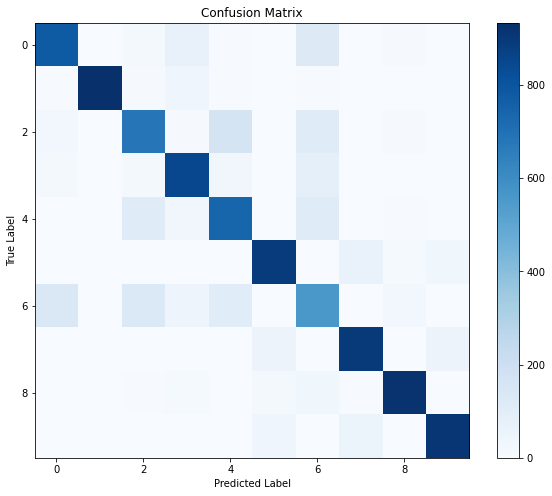

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Fashion-MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Step 2: Preprocess Data (Flatten Images)
x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Flatten each 28x28 image to a 784-dimensional vector
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Step 3: Initialize and Train the LDA Model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_flattened, y_train)

# Step 4: Test the Model
y_pred = lda.predict(x_test_flattened)

# Calculate and Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy on Test Set: {accuracy * 100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [61]:
from sklearn.metrics import classification_report
import random

# Randomly sample 20 indices from the test set
test_indices = random.sample(range(len(x_test_flattened)), 20)

y_test_sample = []
y_pred_sample = []

# Loop over the selected samples
for idx in test_indices:
    sample = x_test_flattened[idx]
    true_label = y_test[idx]
    predicted_label = lda.predict([sample])[0]

    # Collect results
    y_test_sample.append(true_label)
    y_pred_sample.append(predicted_label)

    # Print the result for each test
    print(f"Sample {idx}: True Label - {true_label}, Predicted - {predicted_label}")

# Identify unique labels in the sampled data
unique_labels = sorted(set(y_test_sample))

# Generate and print the classification report
print("\nClassification Report on 20 Random Samples:")
print(classification_report(
    y_test_sample, 
    y_pred_sample, 
    labels=unique_labels,  # Explicitly specify unique labels in the sample
    target_names=[class_names[label] for label in unique_labels]
))



Sample 6717: True Label - 9, Predicted - 9
Sample 7709: True Label - 4, Predicted - 2
Sample 5379: True Label - 0, Predicted - 0
Sample 6545: True Label - 8, Predicted - 8
Sample 3905: True Label - 6, Predicted - 6
Sample 2181: True Label - 8, Predicted - 8
Sample 9892: True Label - 5, Predicted - 5
Sample 5316: True Label - 7, Predicted - 9
Sample 8572: True Label - 8, Predicted - 8
Sample 5507: True Label - 3, Predicted - 3
Sample 2091: True Label - 8, Predicted - 6
Sample 9715: True Label - 7, Predicted - 7
Sample 5420: True Label - 9, Predicted - 9
Sample 5221: True Label - 0, Predicted - 0
Sample 9958: True Label - 0, Predicted - 0
Sample 3307: True Label - 1, Predicted - 1
Sample 2412: True Label - 0, Predicted - 0
Sample 2626: True Label - 4, Predicted - 6
Sample 4706: True Label - 4, Predicted - 4
Sample 6274: True Label - 4, Predicted - 4

Classification Report on 20 Random Samples:
              precision    recall  f1-score   support

 T-shirt/top       1.00      1.00      1

Here’s a table to map the labels 0-9 to their respective class names in the Fashion MNIST dataset:

Label	Class Name
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle Boot